In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Importação necessária para mpatches.Patch
import numpy as np  # Para operações numéricas se necessário

df = pd.read_csv('tourism_dataset.csv')
df

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No
...,...,...,...,...,...,...,...
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes


C:\Users\Ciro Gomes\AppData\Local\Temp\ipykernel_11360\3659321848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Category', y='Visitors', data=category_data, palette=colors)


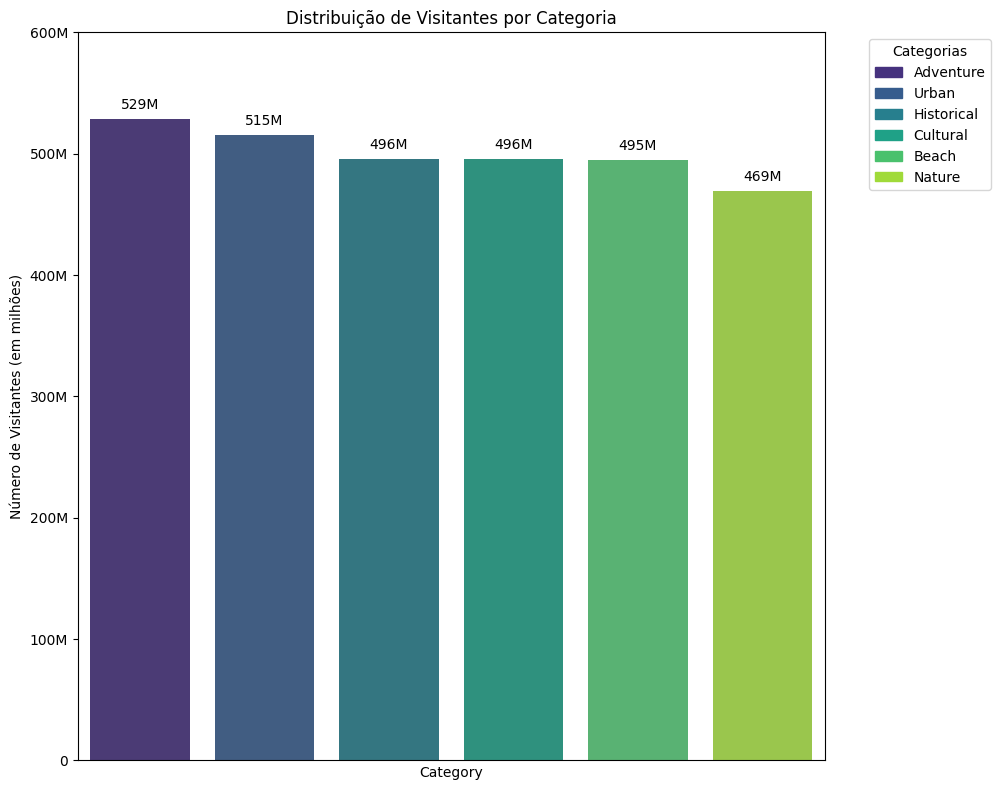

In [13]:
# Supondo que você já tenha o DataFrame carregado e preparado chamado 'df'
# Agrupar dados por categoria e somar os visitantes
category_data = df.groupby('Category')['Visitors'].sum().reset_index()

# Ordenar os dados por número de visitantes, do maior para o menor
category_data = category_data.sort_values('Visitors', ascending=False)

# Definir a paleta de cores
colors = sns.color_palette('viridis', n_colors=category_data['Category'].nunique())

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Category', y='Visitors', data=category_data, palette=colors)

# Remover os rótulos do eixo X
plt.xticks([])

# Adicionar anotações com os valores totais acima de cada barra, formatados em milhões
for p in barplot.patches:
    # Calcula o valor em milhões e formata com 'M' no final
    value = f'{p.get_height() / 1e6:.0f}M'
    barplot.annotate(value,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     size=10, xytext=(0, 10),
                     textcoords='offset points')

# Ajustar a escala do eixo Y para refletir milhões e adicionar espaço extra acima
max_height = category_data['Visitors'].max()
plt.ylim(0, max_height * 1.1)

# Definindo os rótulos do eixo y para milhões
plt.yticks([0] + [i * 1e8 for i in range(1, int(max_height / 1e8) + 2)],
           ['0'] + [f'{i * 100}M' for i in range(1, int(max_height / 1e8) + 2)])

# Criar a legenda com bolinhas coloridas
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, category_data['Category'])]
plt.legend(handles=legend_handles, title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribuição de Visitantes por Categoria')
plt.ylabel('Número de Visitantes (em milhões)')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar o layout para dar espaço à legenda
plt.show()

C:\Users\Ciro Gomes\AppData\Local\Temp\ipykernel_11360\1148259075.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Country', y='Revenue', data=country_revenue, palette=palette)


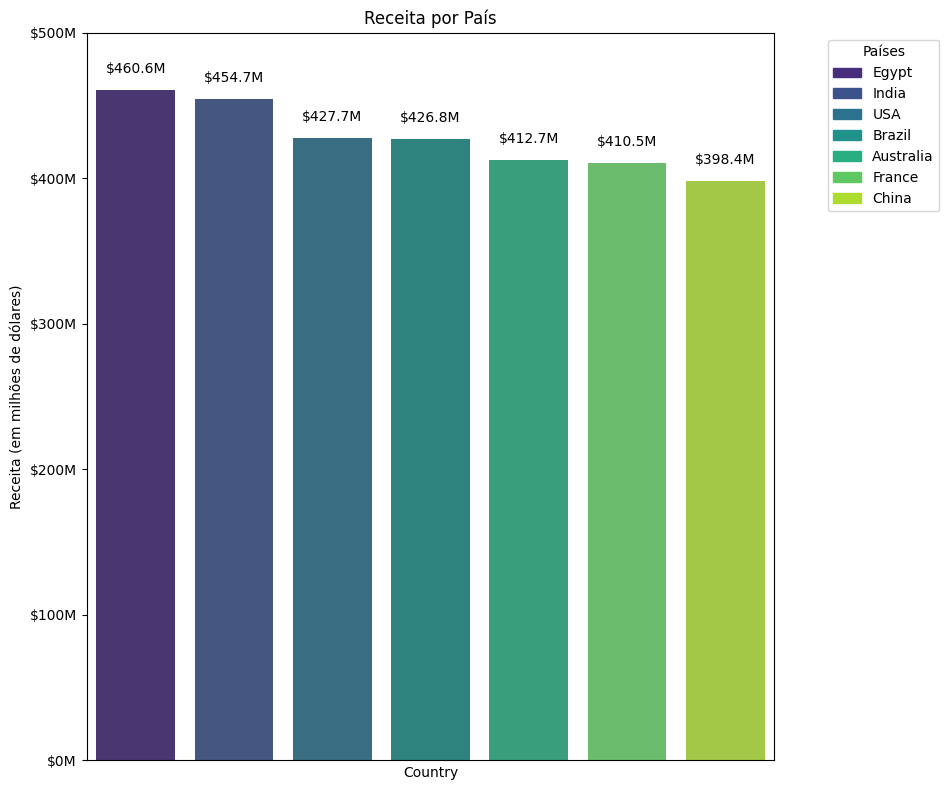

In [14]:
# Supondo que você já tenha o DataFrame carregado chamado 'df'
# Agrupar dados por país e somar a receita
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Ordenar os dados por receita para melhor visualização
country_revenue = country_revenue.sort_values('Revenue', ascending=False)

# Definir a paleta de cores
palette = sns.color_palette('viridis', n_colors=country_revenue['Country'].nunique())

# Criar o gráfico de barras vertical
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Country', y='Revenue', data=country_revenue, palette=palette)

# Adicionar os valores exatos de receita no final de cada barra, formatados em milhões
for p in barplot.patches:
    # Calcula o valor em milhões e formata com 'M' no final
    value_in_millions = p.get_height() / 1e6
    barplot.annotate(f'${value_in_millions:.1f}M',  # Formatar em milhões com uma casa decimal
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom',  # Ajustar o posicionamento horizontal e vertical
                     size=10, xytext=(0, 10),  # Ajuste no deslocamento vertical
                     textcoords='offset points')

# Remover os rótulos do eixo X, pois eles serão substituídos pela legenda
plt.xticks([])

# Ajustar a escala do eixo Y para refletir milhões
max_height = country_revenue['Revenue'].max()
plt.ylim(0, max_height)

# Definir os rótulos do eixo Y para milhões
plt.yticks([i * 1e8 for i in range(0, int(max_height / 1e8) + 2)],
           [f'${i * 100}M' for i in range(0, int(max_height / 1e8) + 2)])

# Configurar os rótulos e título do gráfico
plt.title('Receita por País')
plt.ylabel('Receita (em milhões de dólares)')

# Criar a legenda com as cores correspondentes
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(country_revenue))]
plt.legend(handles, country_revenue['Country'], title='Países', loc='upper right', bbox_to_anchor=(1.25, 1))

# Ajustar o layout para dar espaço à legenda
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar o gráfico
plt.show()

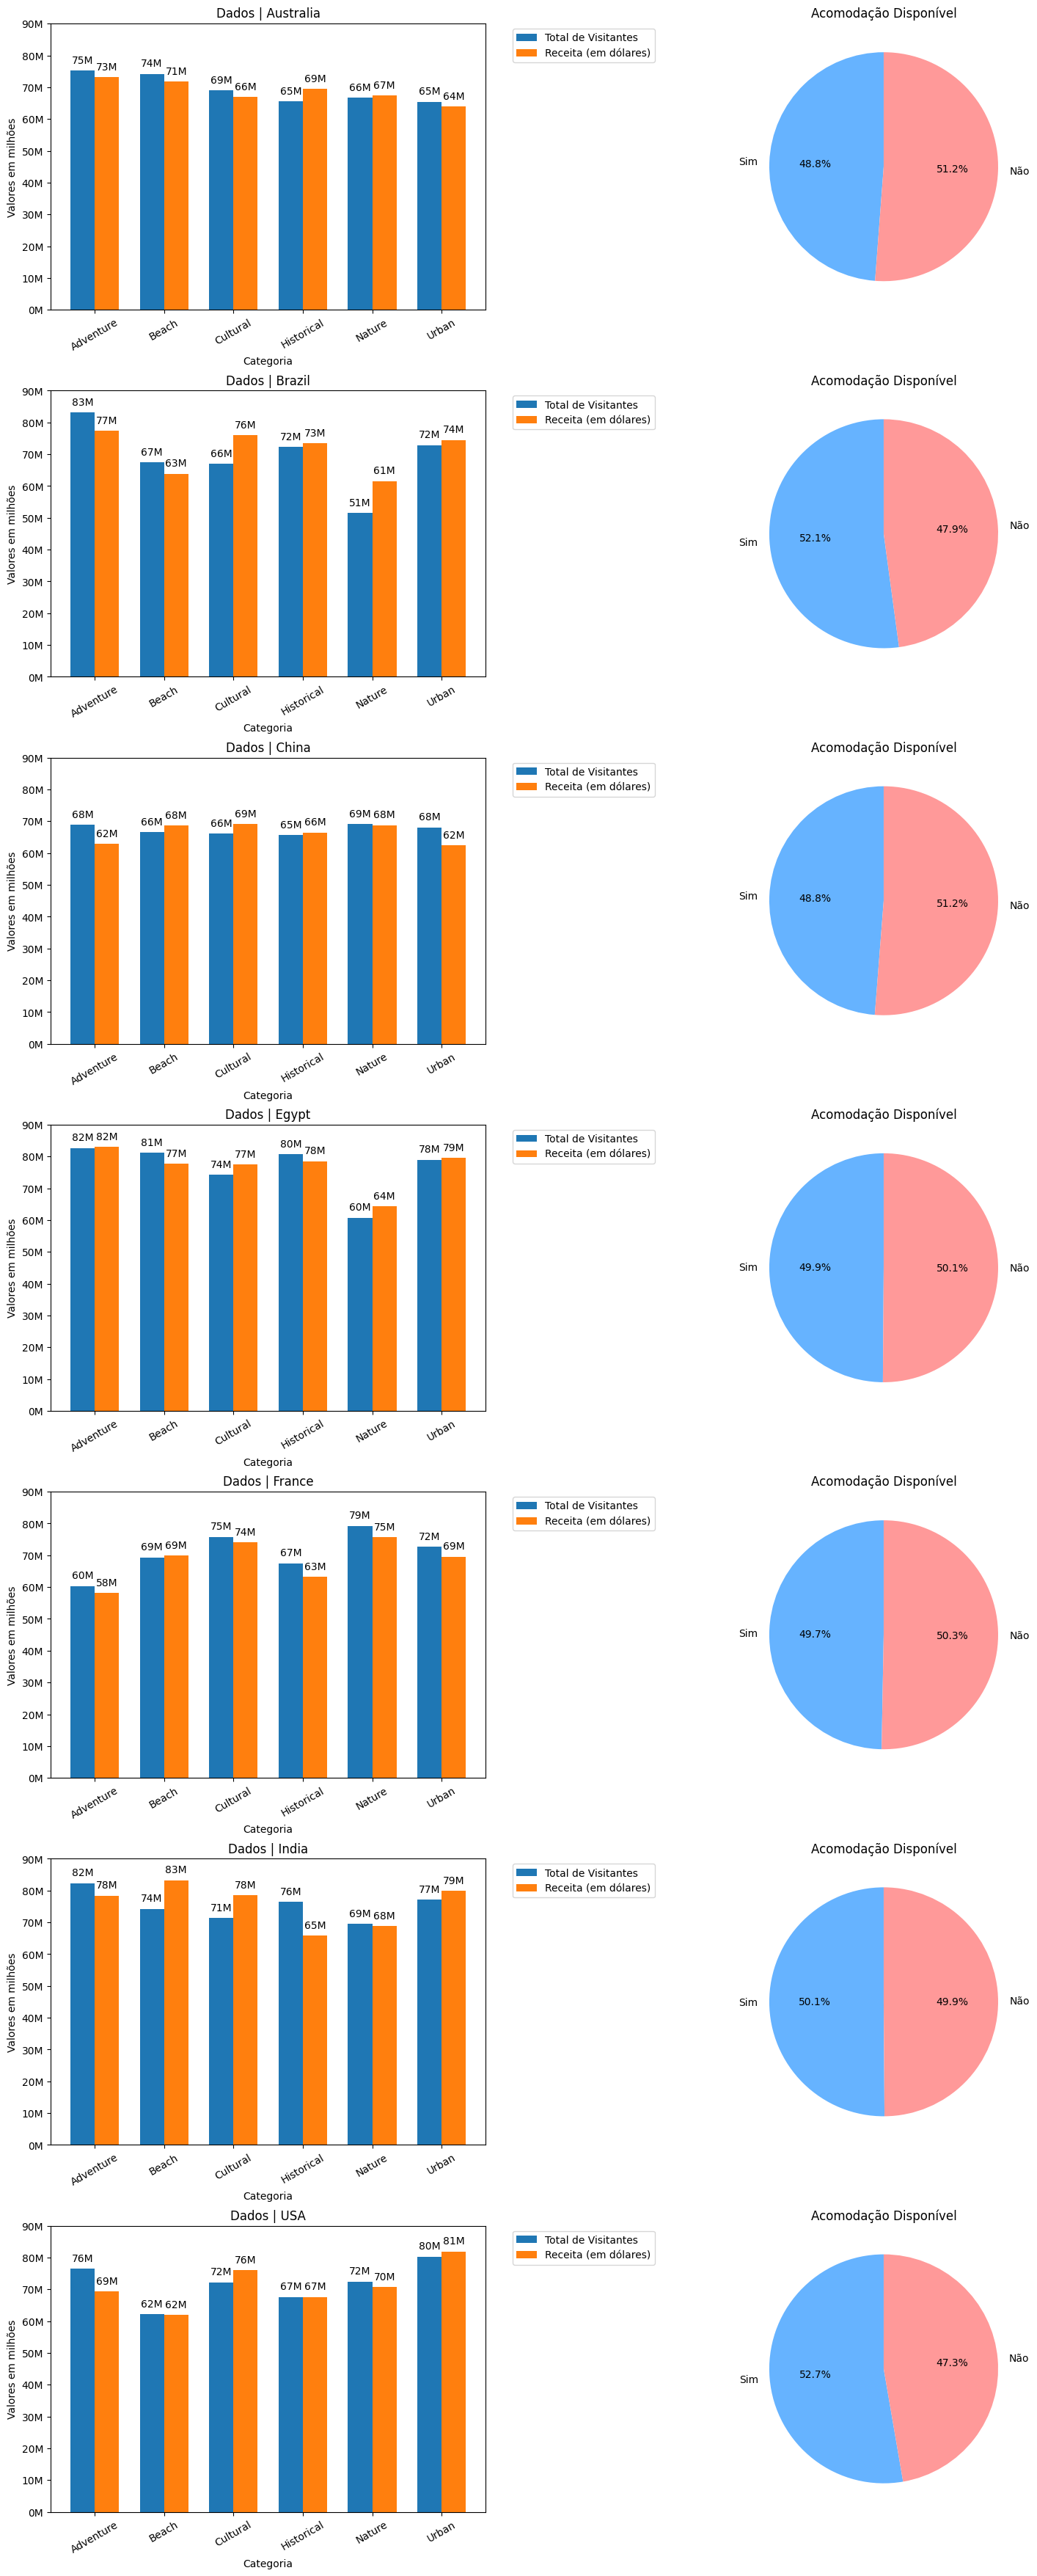

In [32]:

# Traduzir os valores de 'Accommodation_Available'
df['Accommodation_Available'] = df['Accommodation_Available'].replace({'Yes': 'Sim', 'No': 'Não'})

# Calcular a porcentagem de disponibilidade de acomodação para cada país
accommodation_data = df.groupby(['Country', 'Accommodation_Available']).size().reset_index(name='Count')
total_per_country = accommodation_data.groupby('Country')['Count'].sum().reset_index(name='Total')
accommodation_data = pd.merge(accommodation_data, total_per_country, on='Country')
accommodation_data['Percentage'] = (accommodation_data['Count'] / accommodation_data['Total']) * 100

# Agregar dados por país e categoria para soma de visitantes e receita
grouped_data = df.groupby(['Country', 'Category']).agg({
    'Visitors': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Obter a lista de países únicos para criar subplots
countries = grouped_data['Country'].unique()

# Criar figura e axes para os subplots
fig, axes = plt.subplots(nrows=len(countries), ncols=2, figsize=(15, 5 * len(countries)), constrained_layout=True)

if len(countries) == 1:
    axes = [axes]

# Iterar sobre cada país e criar um gráfico para cada
for ax_row, country in zip(axes, countries):
    ax, pie_ax = ax_row
    
    data = grouped_data[grouped_data['Country'] == country]

    # Calcular as porcentagens de Sim e Não para acomodação disponível
    sim_data = accommodation_data[(accommodation_data['Country'] == country) & (accommodation_data['Accommodation_Available'] == 'Sim')]
    nao_data = accommodation_data[(accommodation_data['Country'] == country) & (accommodation_data['Accommodation_Available'] == 'Não')]
    sim_percentage = sim_data['Percentage'].values[0] if not sim_data.empty else 0
    nao_percentage = nao_data['Percentage'].values[0] if not nao_data.empty else 0

    # Configurações de barras
    bar_width = 0.35
    index = np.arange(len(data['Category']))

    visitors_bars = ax.bar(index - bar_width/2, data['Visitors'], bar_width, label='Total de Visitantes')
    revenue_bars = ax.bar(index + bar_width/2, data['Revenue'], bar_width, label='Receita (em dólares)')

    for bar in visitors_bars + revenue_bars:
        height = bar.get_height()
        ax.annotate(f'{int(height/1e6)}M',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_title(f'Dados | {country}')
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Valores em milhões')
    ax.set_xticks(index)
    ax.set_xticklabels(data['Category'], rotation=30)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    # Configurar os ticks do eixo Y para ir de 0 a 90M, em intervalos de 10M
    ticks = range(0, 100000000, 10000000)  # De 0 a 90M, em 10M
    labels = [f'{int(x / 1e6)}M' for x in ticks]
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    pie_ax.pie([sim_percentage, nao_percentage], labels=['Sim', 'Não'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    pie_ax.set_title('Acomodação Disponível')

plt.show()